# Decision Tree and Random Forest Exercise 

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action) or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [1]:
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import pandas as pd
import graphviz
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set()

## Exploratory Data Analysis

Let's do some data visualization! We'll use seaborn and pandas built-in plotting capabilities, but feel free to use whatever library you want. 

Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.



In [3]:
df = pd.read_csv('loan_data.csv')

In [4]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


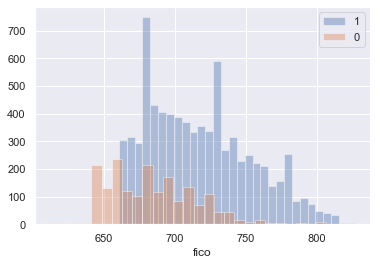

In [5]:
a = df[df['credit.policy']==1]
b = df[df['credit.policy']==0]
sns.distplot(a['fico'], kde=False, label= '1')
sns.distplot(b['fico'], kde=False, label= '0')
plt.legend()

Create a histogram of two not.fully.paid distributions on top of each other, one for each credit.policy outcome.

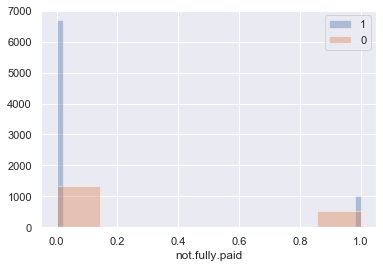

In [6]:
a = df[df['credit.policy']==1]
b = df[df['credit.policy']==0]
sns.distplot(a['not.fully.paid'], kde=False, label = '1')
sns.distplot(b['not.fully.paid'], kde=False, label = '0')
plt.legend()

Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid.

[Text(0, 0, 'debt_consolidation'),
 Text(0, 0, 'credit_card'),
 Text(0, 0, 'all_other'),
 Text(0, 0, 'home_improvement'),
 Text(0, 0, 'small_business'),
 Text(0, 0, 'major_purchase'),
 Text(0, 0, 'educational')]

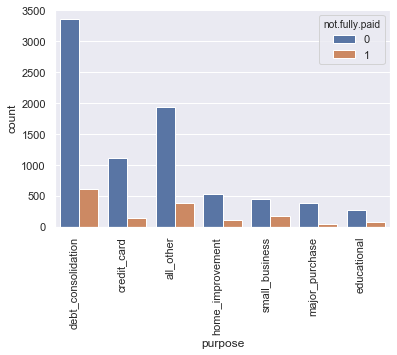

In [7]:
p = sns.countplot(x = 'purpose', hue = 'not.fully.paid', data = df)
p.set_xticklabels(p.get_xticklabels(), rotation=90, horizontalalignment='right')

Plot the trend between FICO score and interest rate using sns jointplot.

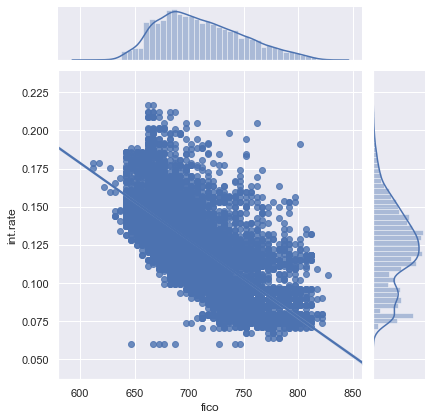

In [8]:
f = sns.JointGrid(x="fico", y="int.rate", data=df)
f = f.plot(sns.regplot, sns.distplot)

Create the lmplots to see if the trend differed between not.fully.paid and credit.policy. Check the documentation for lmplot() if you can't figure out how to separate it into columns.

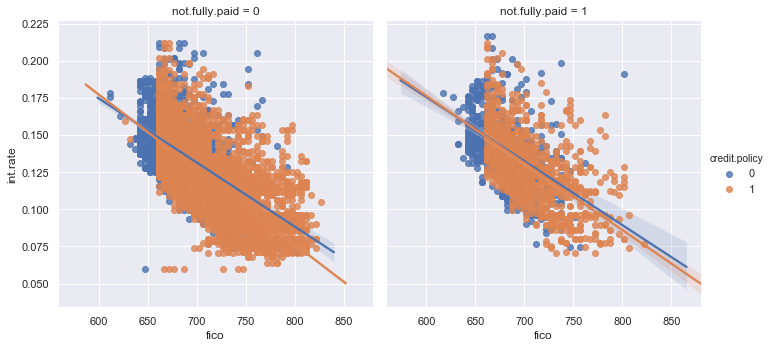

In [9]:
sns.lmplot(x='fico',y='int.rate',data=df,col = 'not.fully.paid', hue='credit.policy')

### Categorical Features

Notice that the purpose column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.


In [10]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [11]:
df_purpose = pd.get_dummies(df,'purpose', drop_first=True)

In [25]:
df.shape

(9578, 14)

### Train Test Split

In [13]:
from sklearn.model_selection import train_test_split

### Training a Decision Tree Model

In [14]:
X = df_purpose.drop('credit.policy', axis =1)
y = df_purpose['credit.policy']
print(y.head())

0    1
1    1
2    1
3    1
4    1
Name: credit.policy, dtype: int64


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

### Predictions and Evaluation of Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
clf = DecisionTreeClassifier()

In [18]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [19]:
y_pred = clf.predict(X_test)

In [20]:
print(y_test.shape)

(2874,)


In [21]:
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       555
           1       0.99      1.00      0.99      2319

    accuracy                           0.99      2874
   macro avg       0.99      0.98      0.98      2874
weighted avg       0.99      0.99      0.99      2874



In [23]:
print(confusion_matrix(y_test,y_pred))

[[ 538   17]
 [  10 2309]]


### Training the Random Forest model

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
y_pred = clf.predict(X_test)

### Predictions and Evaluation

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       555
           1       0.99      1.00      0.99      2319

    accuracy                           0.99      2874
   macro avg       0.99      0.97      0.98      2874
weighted avg       0.99      0.99      0.99      2874



In [31]:
print(confusion_matrix(y_test,y_pred))

[[ 526   29]
 [   5 2314]]
